# Chem 30324, Spring 2025, Homework 6

# Due March 7, 2025

### The diatomic nitric oxide (NO) is an unusual and important molecule. It has an odd number of electrons, which is a rarity for stable molecule. It acts as a signaling molecule in the body, helping to regulate blood pressure, is a primary pollutant from combustion, and is a key constituent of smog. It exists in several isotopic forms, but the most common, ${}^{14}$N= ${}^{16}$O, has a bond length of 1.15077 Å and harmonic vibrational frequency of 1904 cm$^{-1}$.

## Statistical mechanics of vibrating NO

#### 1. Using your knowledge of the harmonic oscillator and the Boltzmann distribution, complete the table below for the first four harmonic vibrational states of $^{14}$N=$^{16}$O.

|Quantum number|Energy (kJ/mol)| Relative population at 400 K| Relative population at 410 K |
|--------------|---------------|-----------------------------|----------|
| $v=0$ | | | |
|  $v = 1$ |   |   |  |
| $v=2$ | | | |
| $v=3$ | | | |

Energy calculation:
\begin{equation}
E=(v+1/2)*h \nu
\end{equation}

Probability of $E_i$:
\begin{equation}
P(E_i)=e^{(-E_i/k_bT)}
\end{equation}


In [25]:
import numpy as np

#initialize constants
h = 6.62607015e-34 #Planks constant in J sec, note this is not hbar
Na = 6.02214e23 # Avogadros constant, we'll need this to go from per molecule to per mole
k = 1.380649e-23 #Boltzmann constant in J/K
c = 2.998e10 # speed of light

freq = 1904*100*c #frequency in m-1 times speed of light, ending in Hz

hoenergy = lambda v:h*freq*(v+0.5)
boltzmann = lambda E,T:np.exp(-E/(k*T))

v = np.array([0,1,2,3])

relpop400 = boltzmann(hoenergy(v),400.)/boltzmann(hoenergy(0),400.)
relpop410 = boltzmann(hoenergy(v),410.)/boltzmann(hoenergy(0),410.)

print('v     energy(J)    relpop 400     relpop 410')
for i in v:
    print(i,hoenergy(i),relpop400[i],relpop410[i])

v     energy(J)    relpop 400     relpop 410
0 1.89114403108344e-18 1.0 1.0
1 5.67343209325032e-18 0.0 0.0
2 9.455720155417201e-18 0.0 0.0
3 1.323800821758408e-17 0.0 0.0


#### 2. Use the table to estimate the average vibrational energy of a mole of $^{14}$N=$^{16}$O at 400 and 410 K.

In [37]:
E400 = 0.
E410 = 0.

for i in v:
    E400 += hoenergy(i)*relpop400[i]
    E410 += hoenergy(i)*relpop410[i]

print(E400,E410)

1.89114403108344e-18 1.89114403108344e-18


#### 3. Use your answer to Question 2 to estimate the vibrational heat capacity ($dE/dT$) of a mole of $^{14}$N=$^{16}$O in this temperature range. How does your answer compare to the classical estimate, 8.314 J/mol K?

In [43]:
heatcapacity = (E410 - E400)/(410-400)

print(heatcapacity)
print('Result is completely inconsistent with classical result. Energy spacings are too large for HO to have a heat capacity')

0.0
Result is completely inconsistent with classical result. Energy spacings are too large for HO to have a heat capacity


#### 4. Predict the harmonic vibrational frequency of the heavier cousin of $^{14}$N=$^{16}$O, $^{15}$N=$^{18}$O, in cm$^{-1}$. Assume the force constant is independent of isotope. Do you think these two isotopes could be distinguished using infrared spectroscopy?

First we calculate the force constant based on $^{14}$N=$^{16}$O, and its given $\nu_1$ to find $\nu_2$
where, $\mu_1$ is the reduced mass of $^{14}$N=$^{16}$O and $\mu_2$ is the reduced mass of $^{15}$N=$^{18}$O

Start with k for $^{14}$N=$^{16}$O:

\begin{equation}
k = \mu_1(2\pi\nu_1)^2
\end{equation}

plug that into the expression for $^{15}$N=$^{18}$O
\begin{equation}
\nu_2=(1/2\pi)*\sqrt{(k/\mu_2)}
\end{equation}

a little simplification before we plug our values in:
\begin{equation}
\nu_2=(1/2\pi)*\sqrt{(\mu_1(2\pi\nu_1)^2/\mu_2)}=\sqrt{\mu_1/\mu_2}*\nu_1
\end{equation}

In [9]:
m1 = 1/(1/14+1/16)
m2 = 1/(1/15+1/18)

freq2=np.sqrt(m1/m2)*1904
print("calculated vibrational frequency of the heavier isotope: ",freq2,"cm-1")

calculated vibrational frequency of the heavier isotope:  1818.8857215746534 cm-1


Based off this calculated difference in wave numbers you should be able to distinguish between the two isotopes.

## Spin the NO.

#### 5. Calculate the moment of inertia of ${}^{14}$N=${}^{16}$O, in amu Å$^2$, the rotational energy constant, $B=\hbar^2/2I$, in kJ mol$^{-1}$, and the rotational spectral constant, $\tilde{B}=B/hc$,  in cm$^{-1}$.



In [10]:
import numpy as np  # Importing numpy for numerical operations

# Atomic masses in atomic mass units (amu)
N = 14.0067  # Atomic mass of Nitrogen (amu)
O = 15.999  # Atomic mass of Oxygen (amu)

# Reduced mass calculation (amu)
mu = N * O / (N + O)  # Reduced mass formula: (m1 * m2) / (m1 + m2)

# Bond length in angstroms (Å)
r = 1.15077  # N-O bond length (angstroms)

# Fundamental constants
h = 6.62607E-34  # Planck's constant (J·s)
hbar = 1.05457E-34  # Reduced Planck's constant (J·s)
NA = 6.02214E23  # Avogadro's number (molecules/mol)
c = 299792458  # Speed of light in vacuum (m/s)

# Moment of inertia (amu·Å²)
I = mu * r**2  # Moment of inertia formula: I = μ * r²
print('The moment of inertia is', round(I, 2), 'amu*angstrom^2.')

# Rotational energy constant (B) in kJ/mol
B = hbar**2 / (2 * I) * 6.022e26 * (1e10)**2 * NA / 1000  # kJ/mol
print('The rotational energy constant is', round(B, 5), ' kJ/mol.')

# Rotational spectral constant (Btilde) in cm⁻¹
Btilde = B / (h * c) * 1000 / NA / 100  # cm⁻¹
print('The rotational spectral constant is', round(Btilde, 3), ' cm^-1.')


The moment of inertia is 9.89 amu*angstrom^2.
The rotational energy constant is 0.02039  kJ/mol.
The rotational spectral constant is 1.704  cm^-1.


#### 6. Imagine that the ${}^{14}$N=${}^{16}$O molecule is adsorbed flat on a surface upon which it is free to rotate. Plot out the energies of the four lowest-energy rotational quantum states, in units of $B$, being sure to include appropriate quantum numbers and degeneracies. Also indicate the total rotational angular moment of each state, in units of $\hbar$.

Since we are looking at a molecule adsorbed flat on a surface, we will use the 2-D rigid rotor model.

$E_{ml} = \frac{\hbar^2}{2I}m_l^2$

The four lowest-energy rotational quantum states are: $m_l = \pm 0,\pm 1, \pm2, \pm3$

   m  E_m (in B)  Degeneracy  L_z (in ħ)
0  0           0           1           0
1  1           1           2           1
2  2           4           2           2
3  3           9           2           3


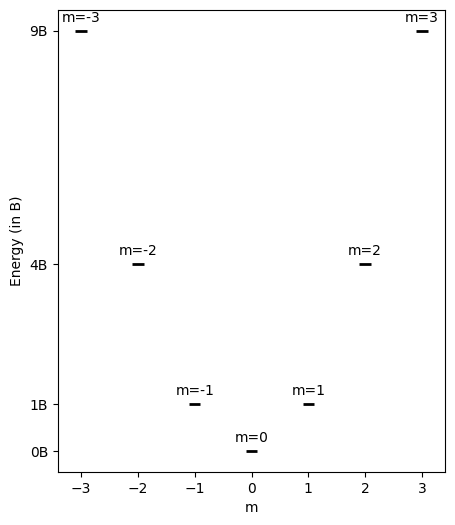

In [12]:
import pandas as pd
# Define quantum number m and corresponding energy levels using given equation
m_values = np.array([0, 1, 2, 3])
E_m = m_values**2  # Energy levels in terms of B
L_z = m_values  # Rotational angular momentum in ħ

# Define degeneracy
degeneracy = np.where(m_values == 0, 1, 2)

# Create table data
table_data = pd.DataFrame({
    "m": m_values,
    "E_m (in B)": E_m,
    "Degeneracy": degeneracy,
    "L_z (in ħ)": L_z
})

# Plot the rotational energy levels
plt.figure(figsize=(5, 6))
for m in m_values:
    E = E_m[m]  # Energy value
    m_vals = [-m, m] if m != 0 else [0]  # Magnetic quantum numbers

    for val in m_vals:
        plt.hlines(E, val-0.1, val+0.1, colors='black', linewidth=2)
        plt.text(val, E + 0.2, f"m={val}", ha='center', fontsize=10)

# Labels and formatting
plt.xlabel("m")
plt.ylabel("Energy (in B)")
plt.yticks(E_m, [f"{e}B" for e in E_m])
plt.title("")
plt.grid(False)

print(table_data)
plt.show()


#### 7. Now imagine the ${}^{14}$N=${}^{16}$O molecule is free to rotate in three-dimensional space. As in Question 6, plot out the energies of the four lowest-energy rotational quantum states, in units of $B$, being sure to include appropriate quantum numbers and degeneracies. Also indicate the total rotational angular moment of each state, in units of $\hbar$.

For a 3-D model of a linear molecule,
\begin{equation}
E_{J} = BJ(J+1)
\end{equation}

and the angular momentum ($L$) is given by

\begin{equation}
  L = \sqrt{J(J+1)} \hbar
\end{equation}

With the number of degeneracies for each of the J given by

\begin{equation}
g_J = 2J + 1
\end{equation}


   J  E_J (in B)  Degeneracy  L (in ħ)
0  0           0           1      0.00
1  1           2           3      1.41
2  2           6           5      2.45
3  3          12           7      3.46


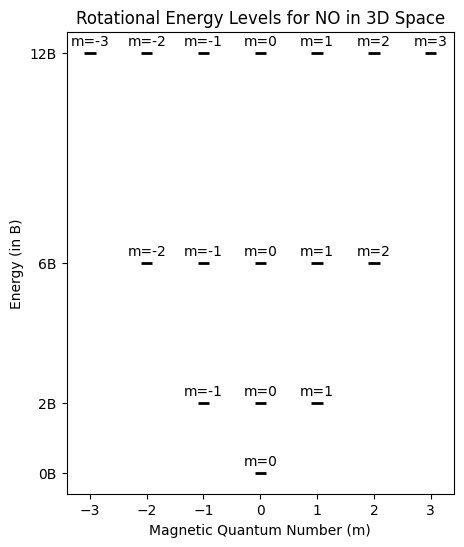

In [13]:
# Define rotational quantum number J and corresponding energy levels using E_J = B * J(J+1)
J_values = np.array([0, 1, 2, 3])
E_J = J_values * (J_values + 1)  # Energy levels in terms of B

# Compute total rotational angular momentum L = sqrt(J(J+1)) ħ
L_values = np.round(np.sqrt(J_values * (J_values + 1)),2)

# Define degeneracy g_J = 2J + 1
degeneracy = 2 * J_values + 1

# Create table data
table_data_3D = pd.DataFrame({
    "J": J_values,
    "E_J (in B)": E_J,
    "Degeneracy": degeneracy,
    "L (in ħ)": L_values
})

# Plot the rotational energy levels
plt.figure(figsize=(5, 6))
for J in range(len(J_values)):
    E = E_J[J]  # Energy value
    m_values = np.arange(-J_values[J], J_values[J] + 1, 1)  # Magnetic quantum numbers

    for m in m_values:
        plt.hlines(E, m-0.1, m+0.1, colors='black', linewidth=2)
        plt.text(m, E + 0.2, f"m={m}", ha='center', fontsize=10)

print(table_data_3D)
# Labels and formatting
plt.xlabel("Magnetic Quantum Number (m)")
plt.ylabel("Energy (in B)")
plt.yticks(E_J, [f"{e}B" for e in E_J])
plt.title("Rotational Energy Levels for NO in 3D Space")

plt.show()


#### 8. Use the vector model to sketch the total angular momentum vectors consistent with $l = 1$.



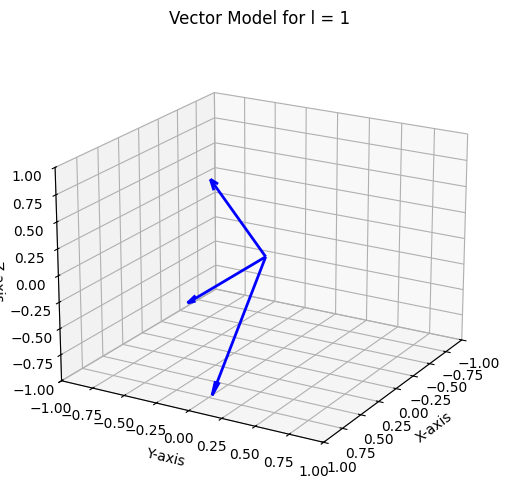

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Define angular momentum vectors for l = 1
l = 1
L_magnitude = np.sqrt(l * (l + 1))  # Magnitude of L in units of ħ
m_values = np.array([-1, 0, 1])  # Allowed m values
Lz_values = m_values  # Lz = mħ

theta = np.arccos(Lz_values / L_magnitude)  # Angle with z-axis

# Choose arbitrary x, y components for visualization
x_components = np.sin(theta)
y_components = np.zeros_like(x_components)

# Plot the vectors
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw vectors
for i in range(len(m_values)):
    ax.quiver(0, 0, 0, x_components[i], y_components[i], Lz_values[i],
              color='b', arrow_length_ratio=0.1, linewidth=2)

# Labels and formatting
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Vector Model for l = 1")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.view_init(elev=20, azim=30)  # Adjust view for better visualization

plt.show()


#### 9. The gross and specific rotational spectroscopy selection rules are that a molecule must have a dipole and that $\Delta l = \pm 1$, respectively. Will ${}^{14}$N=${}^{16}$O have a rotational spectrum? If so, what will it look like, and why?

Yes, a rotational spectrum will be observed because NO is heteronuclear and thus has a dipole moment. The spectrum will consist of a series of equally spaced absorption lines, at frequencies $2\tilde{B}(l+1)$, with $l=0, 1, \ldots$ corresponding to the starting $l$.








## Quantum mechanics of an H atom:
### Consider an excited hydrogen atom with a 2s$^1$ electron configuration. The 2s radial wavefunction is given by $$R_{2,0} = \frac{1}{\sqrt{2a_0^3}}(1-\rho/2)e^{-\rho/2}, \rho = r/a_0$$ where $a_0$ = bohr radius. (*Hint:* It’s easiest to solve the following using $a_0$ as the unit of length.)

#### 10. Provide a complete set of possible quantum numbers for an electron with the 2s wavefunction.

Principle Quantum Number: $n = 2$

Angular Quantum Number: $m_\ell = 0$

Azimuthal Quantum Number: $\ell = 0$

Spin Quantum Number: $m_s = 1/2$ (or $m_s=-1/2$)

#### 11. Provide a hand sketch of the 3-D shape of a 2s wavefunction (“orbital”). Be sure to indicate the *sign* of the wavefunction in each region and the location(s) of nodes. How many radial and how many angular nodes does a 2s wavefunction have?

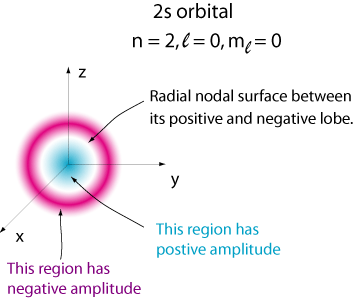

In [55]:
from IPython.display import Image

# Display GIF from a local file
Image(filename="./imgs/2sOrbital.gif")

#### 12. Plot the radial probability function $P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2$. Be sure to label both axes appropriately. (*Hint:* Stick with $a_0$ as the length unit.)

$P_{20}(r) = r^2\lvert R_{2,0}(r)\rvert^2 = \rho^2a_0^2[\frac{1}{\sqrt{2a_0^3}}(1-\rho/2)e^{-\rho/2}]^2 = \frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}\frac{1}{a_0}$. Plot $\frac{\rho^2}{2}(1-\rho/2)^2e^{-\rho}$ vs $\rho$, the unit of P is $\frac{1}{a_0}$.



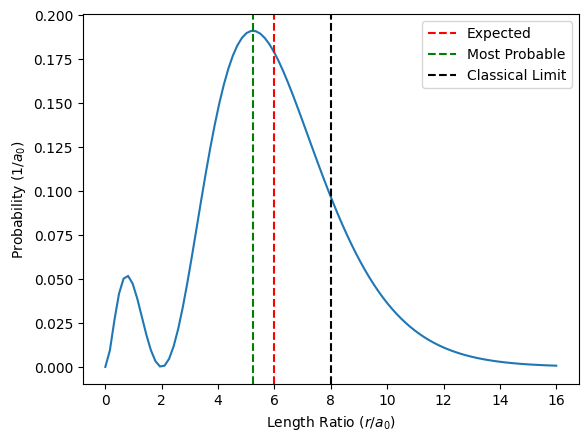

In [15]:
import numpy as np
import matplotlib.pyplot as plt

rho = np.linspace(0,16,100)
a = 1
R20 = 1/(np.sqrt(2*a**3))*(1-rho/2)*np.exp(-rho/2)
P20 = a**2*rho**2*R20**2

plt.plot(rho,P20)
plt.xlabel('Length Ratio ($r/a_0$)')
plt.ylabel('Probability ($1/a_0$)')
plt.axvline(x = 6, color = 'r', linestyle = '--', label = 'Expected')
plt.axvline(x = 3 + np.sqrt(5), color = 'g', linestyle = '--', label = 'Most Probable')
plt.axvline(x = 8, color = 'k', linestyle = '--', label = 'Classical Limit')
plt.legend()
plt.show()

#### 13. Determine and indicate on your plot $\langle r\rangle$, the expectation value of the distance of the electron from the nucleus. (*Hint*: the course outline gives an expression for this expectation value.)

$\langle r\rangle = \int_{0}^{\infty}rP_{20}dr = \int_{0}^{\infty}\frac{\rho^3}{2}(1-\rho/2)^2e^{-\rho}dr = a_0\int_{0}^{\infty}\frac{\rho^3}{2}(1-\rho/2)^2e^{-\rho}d\rho$

In [16]:
from sympy import *
rho = symbols('rho')
I = integrate(rho**3/2*(1-rho/2)**2*exp(-rho),(rho,0,oo))
print('The expectation value of the distance of the electron from the nucleus is',I,"* a0.")

The expectation value of the distance of the electron from the nucleus is 6 * a0.


#### 14. Determine and indicate on your plot  $r_{MP}$, the most probable distance of the electron from the nucleus.

In [17]:
print("Possible solutions are ", solve(diff(rho**2/2*(1-rho/2)**2*exp(-rho),rho),rho))
print('Comparing these solutions, the universal maximum occurs at sqrt(5) + 3')

Possible solutions are  [0, 2, 3 - sqrt(5), sqrt(5) + 3]
Comparing these solutions, the universal maximum occurs at sqrt(5) + 3


#### 15. Determine and indicate on your plot the maximum classical distance of the electron from the nucleus in this orbital.

Classical theory states that orbitals energy must equals to Coulombic energy: $$-\frac{\hbar^2}{2m_ea_o^2}\frac{1}{N^2} = -\frac{e^2}{4\pi\epsilon_0}\frac{1}{r}, where\quad N=2\quad and \quad a_0 = \frac{4\pi\epsilon_0\hbar^2}{m_ee^2}$$
$$r_{max,classic} = 8a_0$$

#### 16. (*Extra credit*) What is the probability of finding the electron beyond the classical distance? (Evaluate the necessary integral numerically.)

In [18]:
rho_ = symbols('rho_')
I = integrate(rho_**2/2*(1-rho_/2)**2*exp(-rho_),(rho_,8,oo)) #intrgrate from 8 to infinity
print("Prob = %f"%I)

Prob = 0.185511


#### 17. Can a 2s electron undergo an allowed transition to a lower energy electronic state? If so, what frequency (in cm$^{-1}$) of light would be emitted?

NO! Quantum number ($n,l,m_l$) of 2s = 2,0,0 while 1s = 1,0,0. Since $\Delta l\neq \pm 1$, the transition is not allowed.